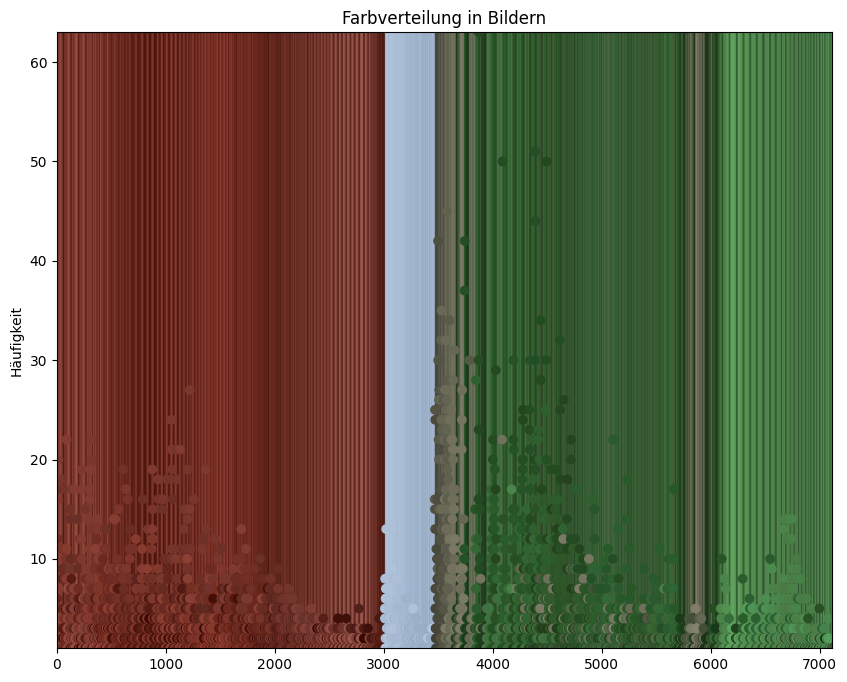

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from collections import defaultdict
import numpy as np

def analyse_images_in_folder(root_folder):
    color_counts = defaultdict(int)

    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                try:
                    with Image.open(os.path.join(root, file)) as img:
                        # Konvertierung in RGB, falls nötig
                        if img.mode != 'RGB':
                            img = img.convert('RGB')

                        for pixel in list(img.getdata()):
                            color_counts[pixel] += 1
                except IOError:
                    print(f"Kann Datei {file} nicht öffnen.")

    return color_counts

def plot_color_distribution(color_counts):
    colors = list(color_counts.keys())
    counts = list(color_counts.values())

    # Erstellen des Farbstreifens für die X-Achse
    color_strip = np.array([colors])
    
    fig, ax = plt.subplots(figsize=(10, 8))

    # Farbstreifen anzeigen
    ax.imshow(color_strip, aspect='auto', extent=[0, len(colors), min(counts), max(counts)])
    
    # Punkte auf den Farbstreifen platzieren
    ax.scatter(range(len(colors)), counts, color=[(r/255, g/255, b/255) for r, g, b in colors])

    plt.ylabel('Häufigkeit')
    plt.title('Farbverteilung in Bildern')
    plt.show()

# Setzen Sie hier den Pfad zu Ihrem Ordner
root_folder = "C:/Users/Dennis/Desktop/New folder"
color_counts = analyse_images_in_folder(root_folder)
plot_color_distribution(color_counts)


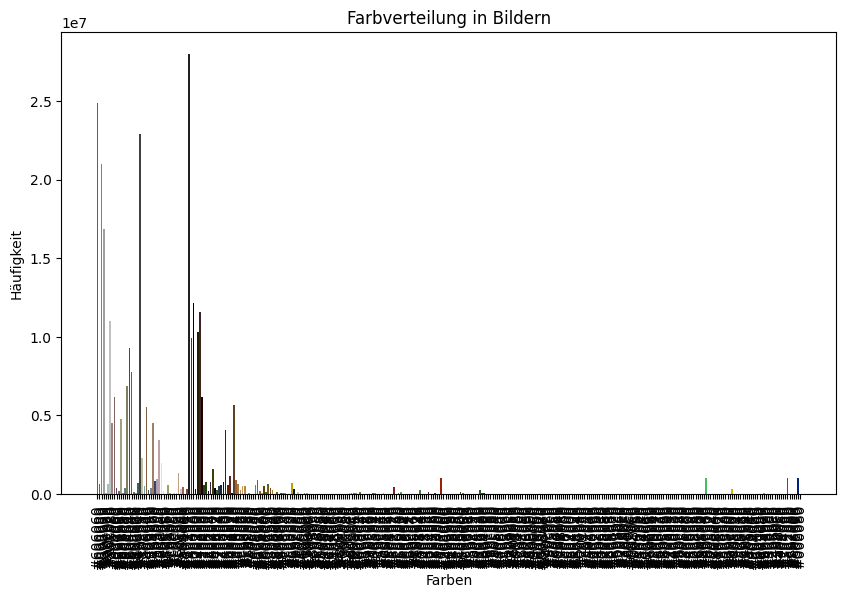

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join

def load_images_from_folder(folder):
    """Lädt alle Bilder aus dem angegebenen Ordner."""
    images = []
    for filename in listdir(folder):
        img = cv2.imread(join(folder, filename))
        if img is not None:
            images.append(img)
    return images

def simplify_color(color, bins_per_channel):
    """Vereinfacht die Farbe, indem sie in weniger Bins pro Kanal reduziert wird."""
    return tuple((component // bins_per_channel) * bins_per_channel for component in color)

def calculate_color_distribution(images, bins_per_channel=32):
    """Berechnet die vereinfachte Farbverteilung in einer Liste von Bildern."""
    color_counts = {}
    for img in images:
        # Konvertiere das Bild in RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        for row in img_rgb:
            for color in row:
                simplified_color = simplify_color(color, bins_per_channel)
                color_counts[simplified_color] = color_counts.get(simplified_color, 0) + 1
    return color_counts

def plot_color_distribution(color_distribution):
    """Plottet die Farbverteilung in einem Säulendiagramm."""
    colors = [f'#{r:02x}{g:02x}{b:02x}' for (r, g, b) in color_distribution.keys()]
    counts = list(color_distribution.values())

    plt.figure(figsize=(10, 6))
    plt.bar(colors, counts, color=colors)
    plt.xlabel('Farben')
    plt.ylabel('Häufigkeit')
    plt.title('Farbverteilung in Bildern')
    plt.xticks(rotation=90)
    plt.show()

folder_path = "C:/Users/Dennis/Desktop/Pro/AITest/imgGen/Data/Data_freepbr1k"

# Laden der Bilder
images = load_images_from_folder(folder_path)

# Berechnen der Farbverteilung
color_distribution = calculate_color_distribution(images)

# Darstellen der Farbverteilung
plot_color_distribution(color_distribution)



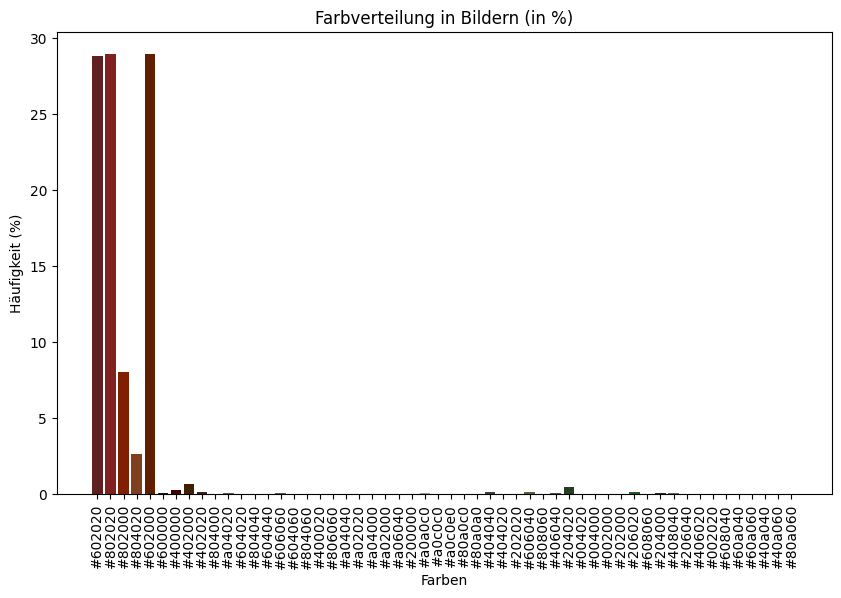

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join

def load_images_from_folder(folder):
    """Lädt alle Bilder aus dem angegebenen Ordner."""
    images = []
    for filename in listdir(folder):
        img = cv2.imread(join(folder, filename))
        if img is not None:
            images.append(img)
    return images

def simplify_color(color, bins_per_channel):
    """Vereinfacht die Farbe, indem sie in weniger Bins pro Kanal reduziert wird."""
    return tuple((component // bins_per_channel) * bins_per_channel for component in color)

def calculate_color_distribution(images, bins_per_channel=32):
    """Berechnet die vereinfachte Farbverteilung in einer Liste von Bildern."""
    color_counts = {}
    total_pixels = 0
    for img in images:
        # Konvertiere das Bild in RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        total_pixels += img_rgb.shape[0] * img_rgb.shape[1]
        for row in img_rgb:
            for color in row:
                simplified_color = simplify_color(color, bins_per_channel)
                color_counts[simplified_color] = color_counts.get(simplified_color, 0) + 1
    return color_counts, total_pixels

def plot_color_distribution(color_distribution, total_pixels):
    """Plottet die Farbverteilung in einem Säulendiagramm."""
    colors = [f'#{r:02x}{g:02x}{b:02x}' for (r, g, b) in color_distribution.keys()]
    counts = [count / total_pixels * 100 for count in color_distribution.values()]

    plt.figure(figsize=(10, 6))
    plt.bar(colors, counts, color=colors)
    plt.xlabel('Farben')
    plt.ylabel('Häufigkeit (%)')
    plt.title('Farbverteilung in Bildern (in %)')
    plt.xticks(rotation=90)
    plt.show()

# Pfad zum Verzeichnis mit Ihren Bildern
folder_path = "C:/Users/Dennis/Desktop/New folder"

# Laden der Bilder
images = load_images_from_folder(folder_path)

# Berechnen der Farbverteilung
color_distribution, total_pixels = calculate_color_distribution(images)

# Darstellen der Farbverteilung
plot_color_distribution(color_distribution, total_pixels)


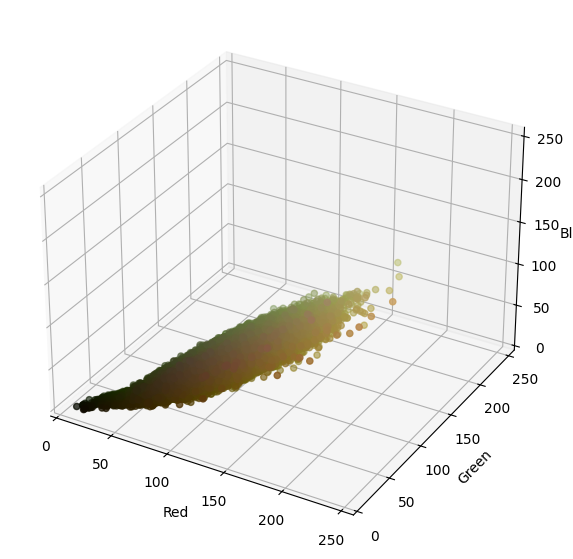

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from PIL import Image

# Load the image
img_path = r"C:\Users\Dennis\Desktop\Pro\AITest\imgGen\Data\Data_Poliigon\GroundGrassGreen002_COL_1K.jpg"
img = Image.open(img_path)

# Convert image into numpy array
img_array = np.array(img)

# Reshape the image to be a list of RGB colors
colors = img_array.reshape((img_array.shape[0] * img_array.shape[1], 3))

# Create a figure and a 3D subplot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting
ax.scatter(colors[:, 0], colors[:, 1], colors[:, 2], c=colors/255.0, marker='o')
ax.set_xlim([0, 255])
ax.set_ylim([0, 255])
ax.set_zlim([0, 255])
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

# Show plot
plt.show()
